In [2]:
# Let's import some packages we'll need.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("housingUnits.csv")
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,223,322,126,208.1300,1,452600
1,21,7099,1338,2401,1138,207.5350,1,358500
2,52,1467,328,496,177,181.4350,1,352100
3,52,1274,293,558,219,141.0775,1,341300
4,52,1627,357,565,259,96.1550,1,342200


**Question 1**
It is a good idea to standardize/normalize the predictor variables 2 and 3 as the blocks are not of equal size. Hence, if we just use the block data as it is, not knowing the differences in size will impact our predictions. Normalizing it will put it all on the same scale.

In [4]:

# Split the data into a predictor matrix X and an outcome vector y
X = df[['total_rooms', 'total_bedrooms']]
y = df['median_house_value']

# Fit a linear regression model using the original variables
model_original = LinearRegression().fit(X, y)
y_pred_original = model_original.predict(X)
mse_original = mean_squared_error(y, y_pred_original)

# Standardize the variables
X_std = (X - X.mean())/X.std()

# Fit a linear regression model using the standardized variables
model_std = LinearRegression().fit(X_std, y)
y_pred_std = model_std.predict(X_std)
mse_std = mean_squared_error(y, y_pred_std)

# Compare the performance of the two models
print("Mean squared error for the original model:", mse_original)
print("Mean squared error for the standardized model:", mse_std)


Mean squared error for the original model: 13075853797.62934
Mean squared error for the standardized model: 13075853797.62934


In [5]:
predictors = df[['total_rooms', 'total_bedrooms']]
print("Variance before normalization:")
print(np.var(predictors))

# Normalize the two columns using the Z-score
predictors = predictors.apply(zscore)

# Calculate the variance of the normalized columns
print("Variance after normalization:")
print(np.var(predictors))

Variance before normalization:
total_rooms       4.759215e+06
total_bedrooms    1.531810e+05
dtype: float64
Variance after normalization:
total_rooms       1.0
total_bedrooms    1.0
dtype: float64


Part 2

In [6]:
p2 = df[['population', 'households', 'median_house_value']]

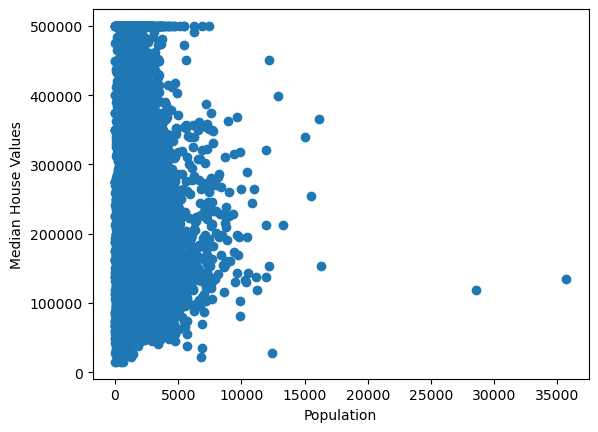

NameError: name 'data' is not defined

In [7]:


# plot a scatter plot between population (column 4) and median house values (target column)
plt.scatter(df['population'], df['median_house_value'])
plt.xlabel('Population')
plt.ylabel('Median House Values')
plt.show()

# plot a scatter plot between number of households (column 5) and median house values (target column)
plt.scatter(data['households'], df['median_house_value'])
plt.xlabel('Number of Households')
plt.ylabel('Median House Values')
plt.show()

In [8]:


# create the predictors (columns 4 and 5) and target (column 6) arrays
X = df[['population', 'households']]
y = df['median_house_value']

# fit a linear regression model to the data
model = LinearRegression().fit(X, y)

# calculate the R^2 value
r2 = model.score(X, y)
print("R^2 value: ", r2)

R^2 value:  0.04457646220090605


In [9]:
corr2 = p2.corr()
print(corr2)

                    population  households  median_house_value
population            1.000000    0.907222           -0.024650
households            0.907222    1.000000            0.065843
median_house_value   -0.024650    0.065843            1.000000


**Question 2**

In [14]:
from scipy.stats import zscore

# Select the columns to normalize
normalize_cols = ['total_rooms', 'total_bedrooms']

# Calculate the correlation between the selected columns and both normalization columns
corr_pop = df[normalize_cols + ['population']].corr().iloc[:-1, -1]
corr_hh = df[normalize_cols + ['households']].corr().iloc[:-1, -1]

# Decide which normalization column to use based on the highest absolute correlation
if abs(corr_pop).sum() > abs(corr_hh).sum():
    normalization_col = 'population'
else:
    normalization_col = 'households'
print(normalization_col)
print(abs(corr_hh).sum())
# Use this column to normalize the selected columns
df[normalize_cols] = df[normalize_cols].apply(lambda x: (x - x.mean()) / x.std())

# Check the variance of the normalized columns
print("Variance of the normalized columns:")
print(df[normalize_cols].var())

households
1.8369656339627016
Variance of the normalized columns:
total_rooms       1.0
total_bedrooms    1.0
dtype: float64


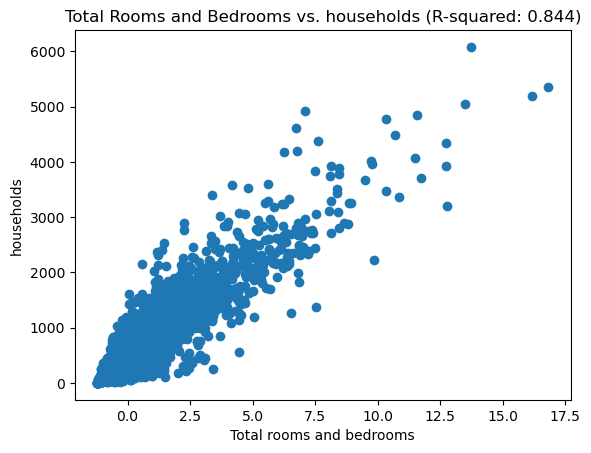

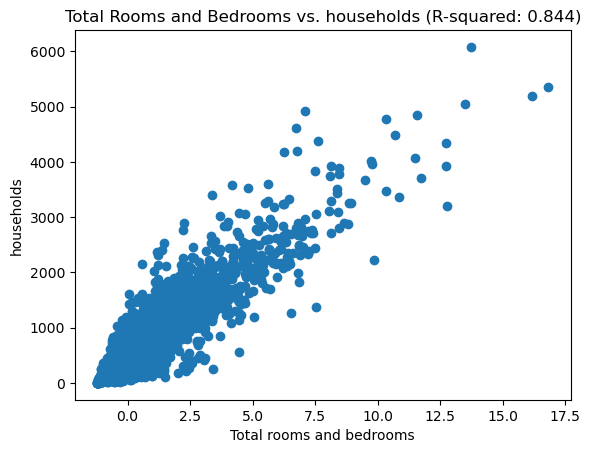

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
for col in normalize_cols:
    x = df[col]
    y = df[normalization_col]
    r, p = pearsonr(x, y)
    plt.scatter(x, y)
    plt.xlabel("Total rooms and bedrooms")
    plt.ylabel(normalization_col)
    plt.title(f"Total Rooms and Bedrooms vs. {normalization_col} (R-squared: {r**2:.3f})")
    plt.show()


**Question 3**

Best predictor: median_income


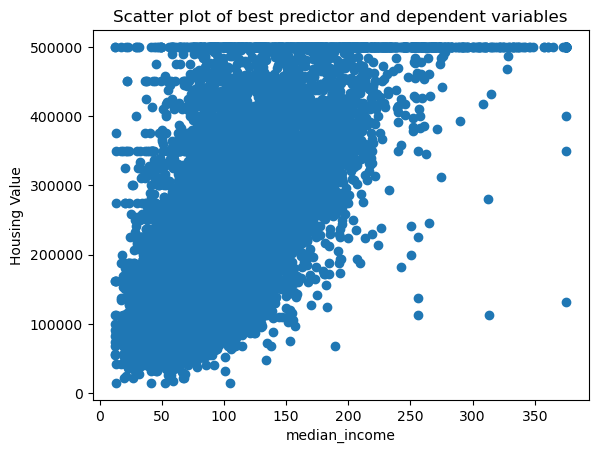

Worst predictor: population


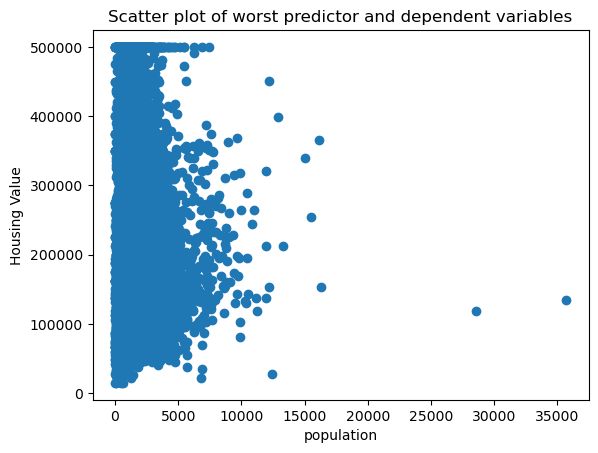

In [12]:
# Split the data into independent and dependent variables
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

# Fit a linear regression model for each predictor variable and calculate its R-squared value
r2_scores = {}
for col in X.columns:
    X_temp = X[[col]]
    model = LinearRegression()
    model.fit(X_temp, y)
    y_pred = model.predict(X_temp)
    r2_scores[col] = r2_score(y, y_pred)

# Get the column with the highest R-squared value
best_predictor = max(r2_scores, key=r2_scores.get)
print("Best predictor:", best_predictor)

# Plot the scatter plot of the best predictor and dependent variables
plt.scatter(X[best_predictor], y)
plt.xlabel(best_predictor)
plt.ylabel('Housing Value')
plt.title('Scatter plot of best predictor and dependent variables')
plt.show()

# Check for potential issues in the scatter plot and comment on it
if any(X[best_predictor].isna()):
    print("Best predictor has missing values, which may affect the model performance.")
if any(y.isna()):
    print("Dependent variable has missing values, which may affect the model performance.")
if X[best_predictor].nunique() == 1:
    print("Best predictor has only one unique value, which may affect the model performance.")
if y.nunique() == 1:
    print("Dependent variable has only one unique value, which may affect the model performance.")

# Get the column with the lowest R-squared value
worst_predictor = min(r2_scores, key=r2_scores.get)
print("Worst predictor:", worst_predictor)

# Plot the scatter plot of the worst predictor and dependent variables
plt.scatter(X[worst_predictor], y)
plt.xlabel(worst_predictor)
plt.ylabel('Housing Value')
plt.title('Scatter plot of worst predictor and dependent variables')
plt.show()

**Question 4**

In [86]:

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score


# Split the data into features (predictors) and target (output)
features = df.iloc[:, :7] # select columns 1 to 7 as predictors
target = df.iloc[:, 7] # select column 8 as target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Fit a multiple regression model using all predictors
reg = LinearRegression().fit(X_train, y_train)

# Make predictions using the multiple regression model
y_pred_multi = reg.predict(X_test)

# Evaluate the multiple regression model
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print(f"Multiple Regression Model\nMSE: {mse_multi:.2f}\nR2: {r2_multi:.2f}\n")

# Fit a simple linear regression model using the single best predictor
best_predictor = df[['median_income']] # select the best predictor column

X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(best_predictor, target, test_size=0.2)

reg_single = LinearRegression().fit(X_train_single, y_train_single)

# Make predictions using the simple linear regression model
y_pred_single = reg_single.predict(X_test_single)

# Evaluate the simple linear regression model
mse_single = mean_squared_error(y_test_single, y_pred_single)
r2_single = r2_score(y_test_single, y_pred_single)
print(f"Single Predictor Model\nMSE: {mse_single:.2f}\nR2: {r2_single:.2f}")

# Compare the multiple and single predictor models
if mse_multi < mse_single:
    print("The multiple regression model has a lower MSE and is a better fit for the data.")
else:
    print("The single predictor model has a lower MSE and is a better fit for the data.")


Multiple Regression Model
MSE: 5354465181.29
R2: 0.61

Single Predictor Model
MSE: 7109257106.15
R2: 0.46
The multiple regression model has a lower MSE and is a better fit for the data.


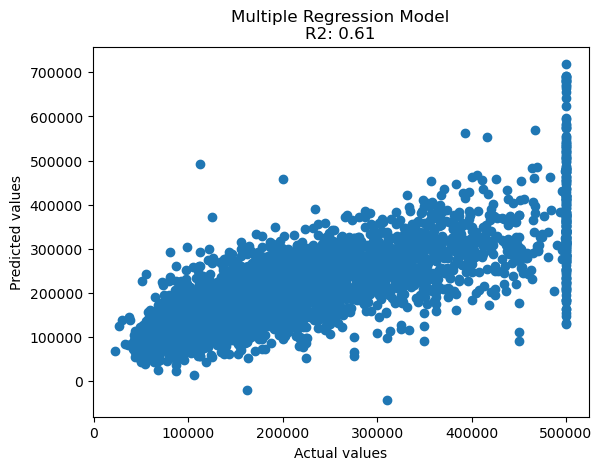

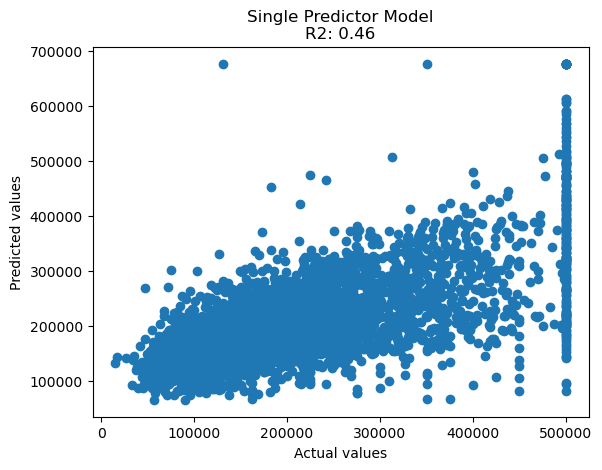

In [101]:

# Plot the actual vs. predicted values for the multiple regression model
plt.scatter(y_test, y_pred_multi)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Multiple Regression Model\nR2: {:.2f}".format(r2_multi))
plt.show()

# Plot the actual vs. predicted values for the single predictor model
plt.scatter(y_test_single, y_pred_single)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Single Predictor Model\nR2: {:.2f}".format(r2_single))
plt.show()

**Question 5**

In [103]:


# Calculate Pearson correlation coefficient between standardized variables 2 and 3
corr = np.corrcoef(df['var2_std'], df['var3_std'])[0,1]
print("Pearson correlation coefficient between standardized variables 2 and 3:", corr)




# Calculate Pearson correlation coefficient between standardized variables 4 and 5
corr = np.corrcoef(df['var4_std'], df['var5_std'])[0,1]
print("Pearson correlation coefficient between standardized variables 4 and 5:", corr)


Pearson correlation coefficient between standardized variables 2 and 3: 0.9999997239297043
Pearson correlation coefficient between standardized variables 4 and 5: 0.9072222660959607


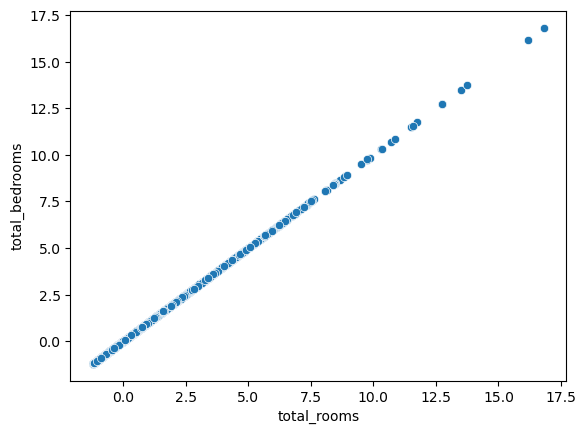

Pearson correlation coefficient between standardized variables 2 and 3: 0.9999997239297043


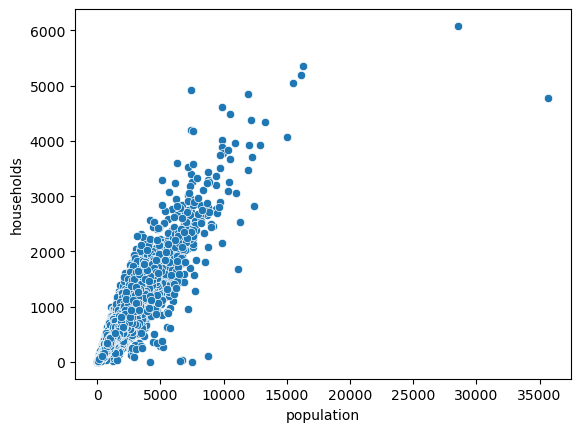

Pearson correlation coefficient between standardized variables 4 and 5: 0.9072222660959607


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of the two variables
sns.scatterplot(x=df['total_rooms'], y=df['total_bedrooms'])
plt.show()

# Calculate Pearson correlation coefficient between standardized variables 2 and 3
corr = np.corrcoef(df['var2_std'], df['var3_std'])[0,1]
print("Pearson correlation coefficient between standardized variables 2 and 3:", corr)

# Scatterplot of the two variables
sns.scatterplot(x=df['population'], y=df['households'])
plt.show()


# Calculate Pearson correlation coefficient between standardized variables 4 and 5
corr = np.corrcoef(df['var4_std'], df['var5_std'])[0,1]
print("Pearson correlation coefficient between standardized variables 4 and 5:", corr)



**Extra Credit**

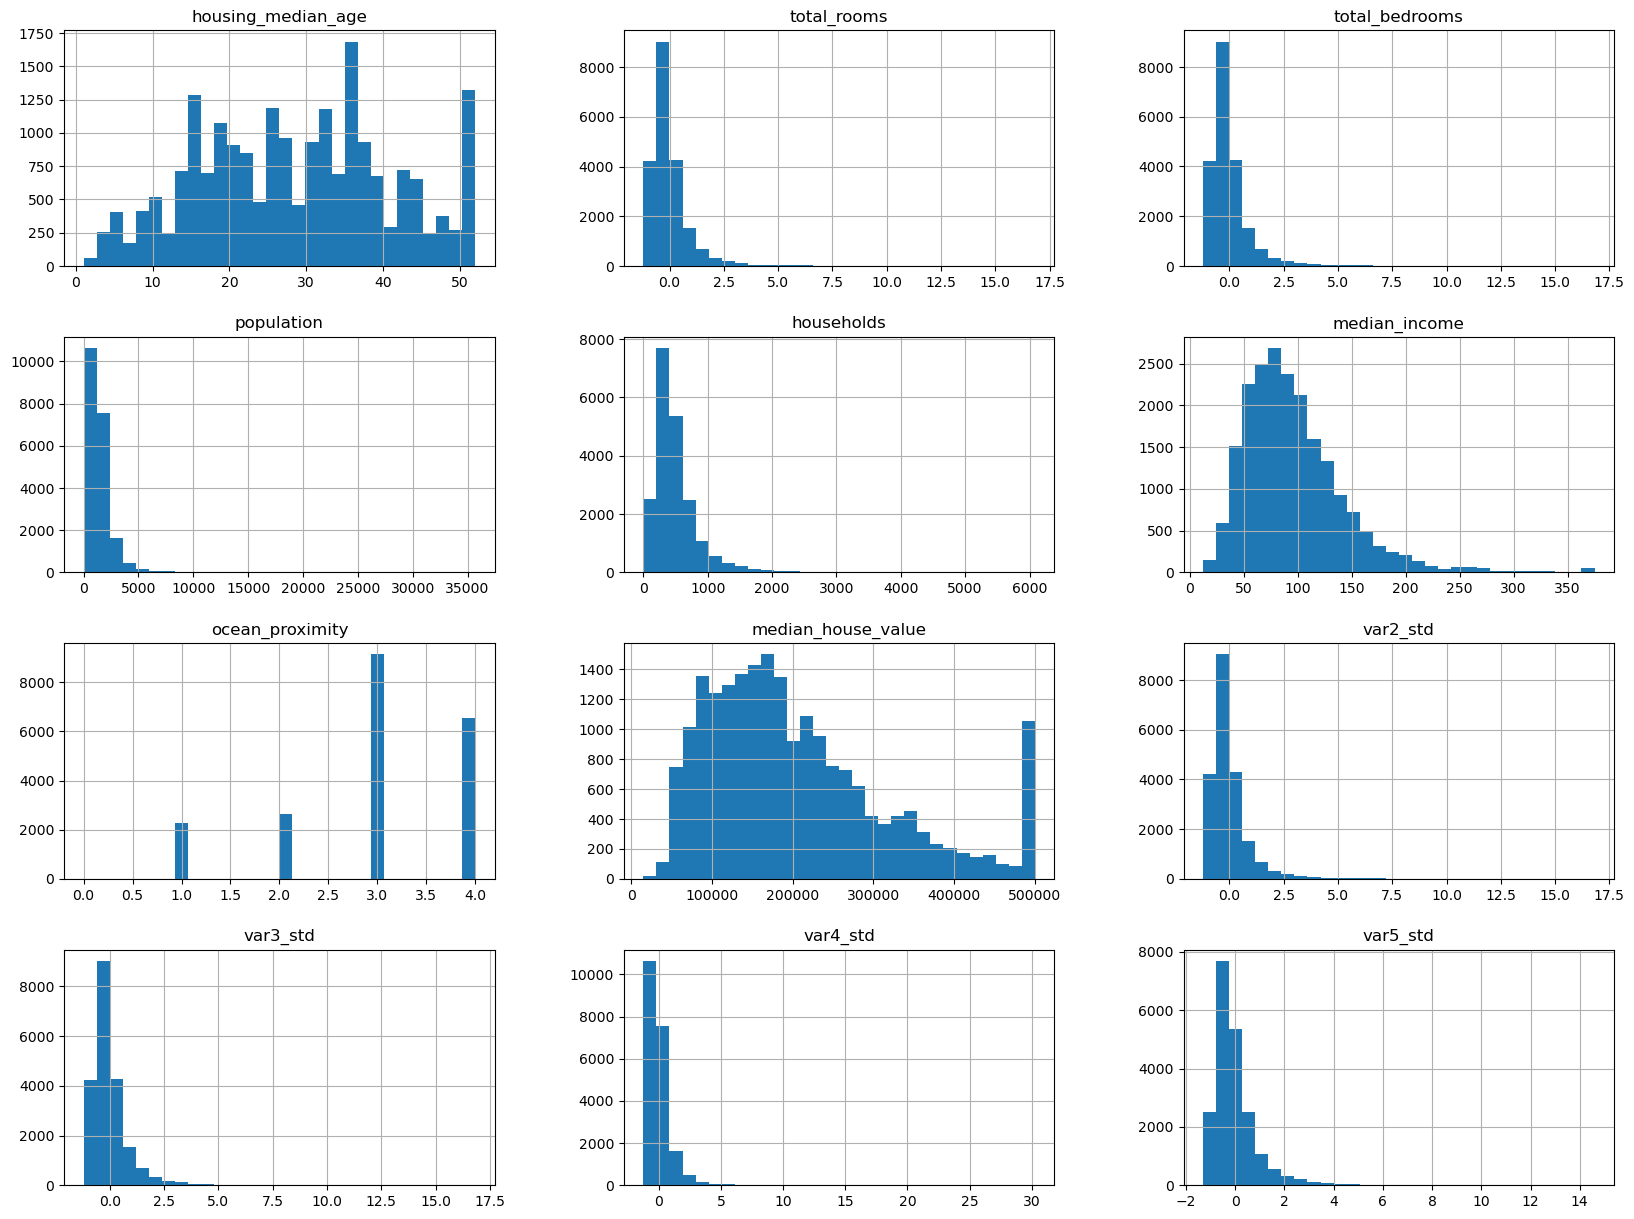

In [108]:
# a)
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot histograms for all variables in the dataframe
df.hist(bins=30, figsize=(20,15))
plt.show()


/Users/suvirwadhwa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


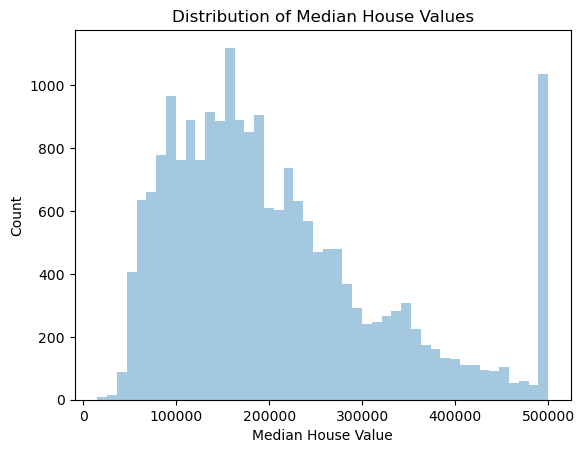

In [109]:
# b)
# Plot the distribution of the outcome variable
sns.distplot(df['median_house_value'], kde=False)
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.title("Distribution of Median House Values")
plt.show()

In [110]:
# Check for skewness in the distribution
skew = df['median_house_value'].skew()
print("Skewness of Median House Values:", skew)

Skewness of Median House Values: 0.9777632739098341


In [112]:
if abs(skew) > 0.5:
    print("The distribution is significantly skewed, which might limit the validity of the conclusions.")
else:
    print("The distribution is not significantly skewed.")

The distribution is significantly skewed, which might limit the validity of the conclusions.
